In [3]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [6]:
def convolve_im_freq(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    im_f = im.astype(np.float32, copy=False)
    
    F_im = np.fft.fft2(im_f)
    
    F_filt = F_im * fft_kernel.astype(np.complex64, copy=False)
    
    im_filt = np.fft.ifft2(F_filt)
    im_filt = np.real(im_filt)
    
    if verbose:
        amp_im      = np.log1p(np.abs(np.fft.fftshift(F_im)))
        amp_kernel  = np.log1p(np.abs(np.fft.fftshift(fft_kernel)))
        amp_filt_im = np.log1p(np.abs(np.fft.fftshift(F_filt)))
        
        plt.figure(figsize=(20, 4))
        
        # 1. Original image
        plt.subplot(1, 5, 1)
        plt.imshow(im_f, cmap="gray")
        plt.title("Original Image")
        plt.axis('off')
        
        # 2. |F{f}|
        plt.subplot(1, 5, 2)
        plt.imshow(amp_im, cmap="gray")
        plt.title("Amplitude of Image (|F{f}|)")
        plt.axis('off')
        
        # 3. |H|
        plt.subplot(1, 5, 3)
        plt.imshow(amp_kernel, cmap="gray")
        plt.title("Amplitude of Filter (|H|)")
        plt.axis('off')
        
        # 4. |H·F{f}|
        plt.subplot(1, 5, 4)
        plt.imshow(amp_filt_im, cmap="gray")
        plt.title("Amplitude of Filtered (|H·F{f}|)")
        plt.axis('off')
        
        # 5. Filtered spatial image
        plt.subplot(1, 5, 5)
        plt.imshow(im_filt, cmap="gray")
        plt.title("Filtered Spatial Image")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    return im_filt

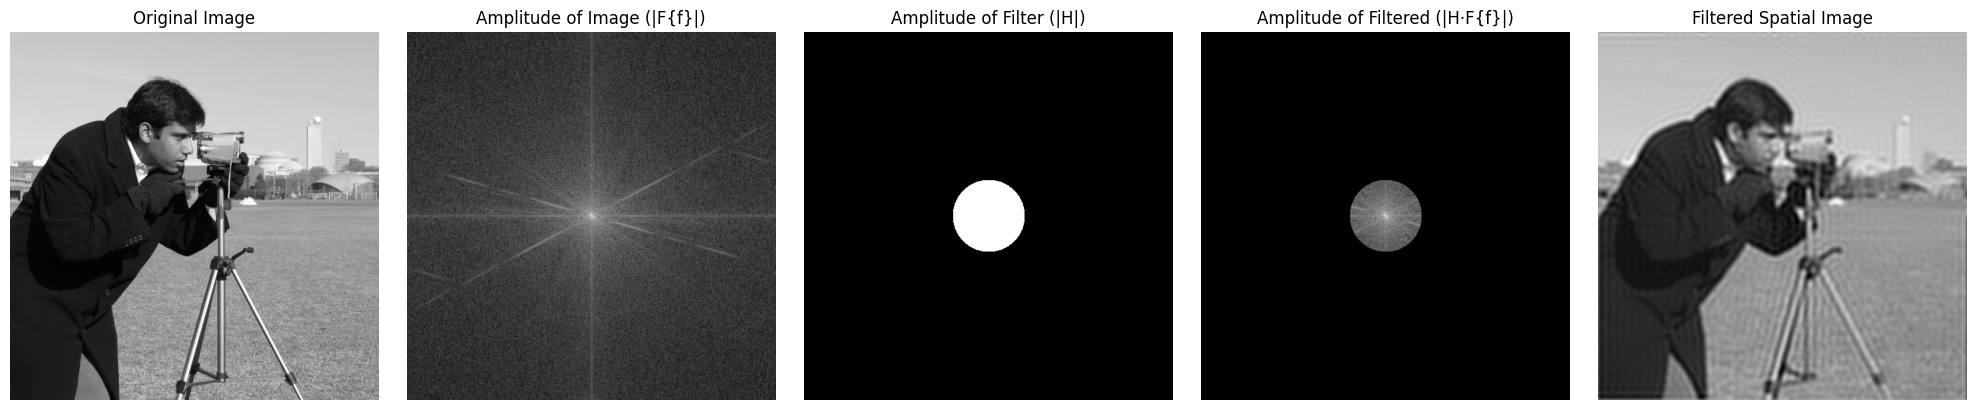

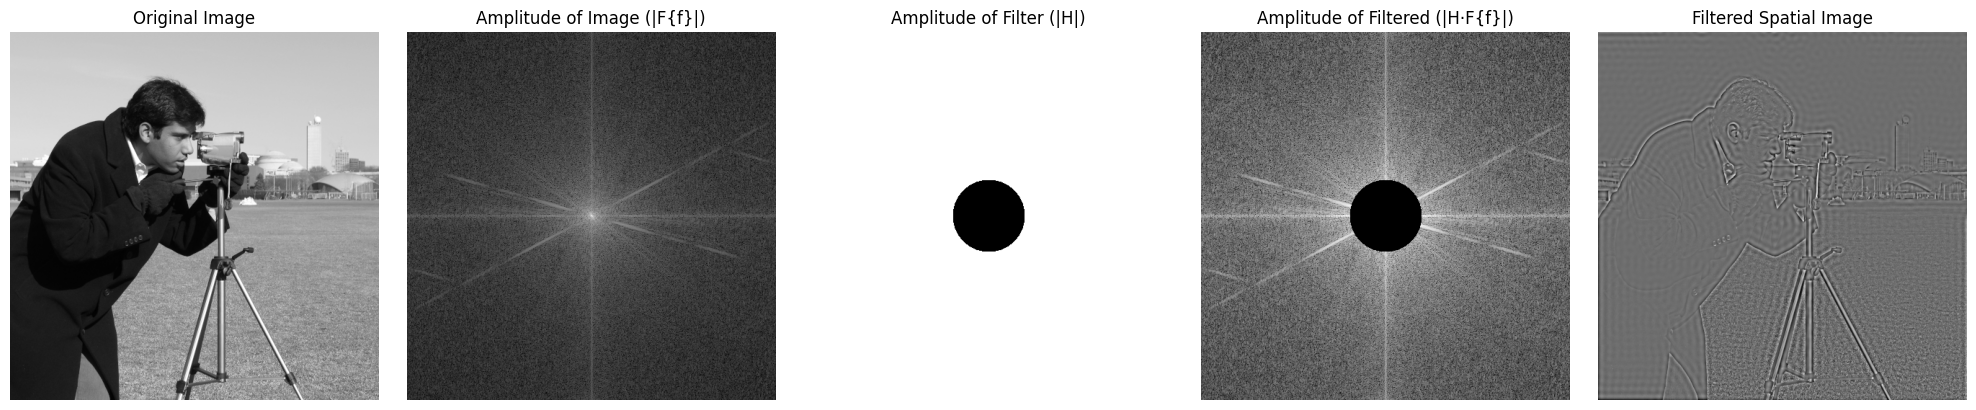

Saving image to: image_processed/camera_low_pass.png
Saving image to: image_processed/camera_high_pass.png


/home/vegardhoug/NTNU/5H25/TDT4195_Visual_computing_fundementals/visual-computing-ip/Assignment 2/utils.py:27: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")
/home/vegardhoug/NTNU/5H25/TDT4195_Visual_computing_fundementals/visual-computing-ip/Assignment 2/utils.py:27: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


In [5]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im_freq(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im_freq(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)